## Generate a three class gaussian data using sklearn.dataset library as shown below:

In [8]:
import numpy as np
from sklearn.datasets import make_blobs

# generate three-class Gaussian dataset
X, y = make_blobs(n_samples=500, centers=3,
                  cluster_std=[1.0, 1.5, 2.0],
                  random_state=0)



## Plot the generated dataset showing three different classes as three different colored dots in same plot

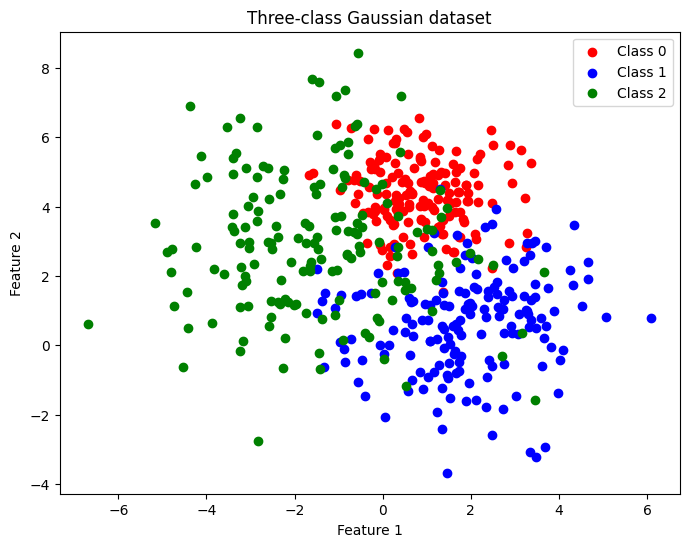

In [9]:
import matplotlib.pyplot as plt

# plot the generated dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color='blue', label='Class 1')
plt.scatter(X[y == 2, 0], X[y == 2, 1],
            color='green', label='Class 2')
plt.legend(loc='best')
plt.title('Three-class Gaussian dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Split the 80:20 Train:Test dataset and then plot the unlabeled train dataset with single color and unlabeled test dataset with another color in same plot

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

# plot the unlabeled training and testing datasets
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], color='gray',
            label='Unlabeled Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], color='black',
            label='Unlabeled Test Data')
plt.legend(loc='best')
plt.title('Unlabeled Training and Test Datasets')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Build and apply Naïve Bays algorithm to the train dataset

In [11]:
class GaussianNB:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        
        self.mean_ = np.zeros((n_classes, n_features))
        self.var_ = np.zeros((n_classes, n_features))
        self.priors_ = np.zeros(n_classes)
        
        for c in self.classes_:
            X_c = X[c == y]
            self.mean_[c,:] = X_c.mean(axis=0)
            self.var_[c,:] = X_c.var(axis=0)
            self.priors_[c] = X_c.shape[0] / float(n_samples)
        
    def predict(self, X):
        n_samples, n_features = X.shape
        y_pred = np.zeros(n_samples)
        for i in range(n_samples):
            posteriors = []
            for c in self.classes_:
                prior = np.log(self.priors_[c])
                likelihood = np.sum(np.log(self._pdf(X[i,:], c)))
                posterior = prior + likelihood
                posteriors.append(posterior)
            y_pred[i] = self.classes_[np.argmax(posteriors)]
        return y_pred
    
    def _pdf(self, X, class_idx):
        mean = self.mean_[class_idx]
        var = self.var_[class_idx]
        numerator = np.exp(-(X-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [12]:
# train the model on the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)



## Test your model and report the accuracy of test data

In [13]:
# make predictions on the test data
y_pred = gnb.predict(X_test)

# compute the accuracy of the model on the test data
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84
